<a href="https://colab.research.google.com/github/Aswanthofficial/AutoML_Frameworks_for_Sustainable_Fuel_Efficiency_Predictions/blob/main/AutoML_Frameworks_for_Sustainable_Fuel_Efficiency_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***AutoML***

***AutoML Frameworks for Sustainable Fuel Efficiency Predictions***

In [ ]:
# Install necessary packages
!pip install -q seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
np.set_printoptions(precision=3, suppress=True)

# TensorFlow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Load dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()


TensorFlow version: 2.18.0


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [ ]:
x = dataset.drop('MPG', axis=1)
y = dataset['MPG']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(" Gradient Boosting Regressor Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

 Gradient Boosting Regressor Performance:
Mean Squared Error (MSE): 6.837353064702478
Root Mean Squared Error (RMSE): 2.6148332766550295
Mean Absolute Error (MAE): 1.8205440997906752
R² Score: 0.8660408515990048


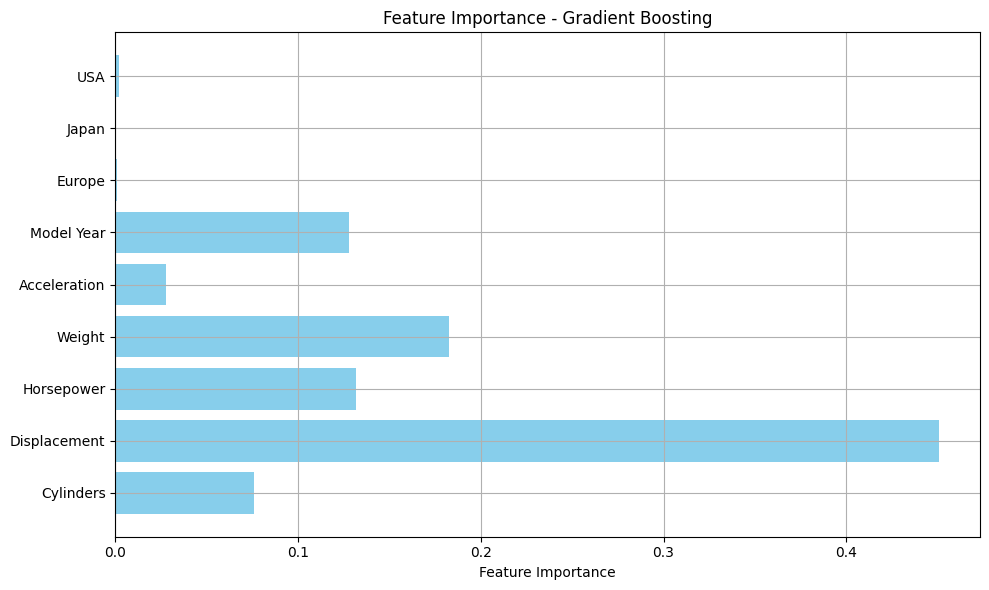

In [ ]:
importances = model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.grid(True)
plt.tight_layout()
plt.show()

 ***PYCART***

In [ ]:
!pip install --upgrade --force-reinstall --no-deps \
  pycaret==3.3.0 \
  pandas==2.1.4 \
  scikit-learn==1.3.2 \
  numpy==1.24.4 \
  matplotlib==3.7.5

  Using cached pycaret-3.3.0-py3-none-any.whl.metadata (17 kB)
  Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached matplotlib-3.7.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.7 kB)
Using cached pycaret-3.3.0-py3-none-any.whl (485 kB)
Using cached pandas-2.1.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached matplotlib-3.7.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installati

In [ ]:
import pandas as pd
from pycaret.regression import *

In [ ]:
# Load dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
# Copy dataset and clean
data = raw_dataset.copy()
data = data.dropna()

In [ ]:
data['Origin'] = data['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:

reg_setup = setup(data, target='MPG', session_id=42, train_size=0.8, verbose=False)

In [ ]:
best_model = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.9893,8.0953,2.7681,0.8643,0.1051,0.0839,0.0690
et,Extra Trees Regressor,1.9990,8.1298,2.7833,0.8641,0.1033,0.0831,0.1520
gbr,Gradient Boosting Regressor,2.0358,8.3312,2.8163,0.8596,0.1069,0.0857,0.1720
rf,Random Forest Regressor,2.0581,8.5251,2.8443,0.8583,0.1075,0.0867,0.2180
xgboost,Extreme Gradient Boosting,2.2090,9.9827,3.0861,0.8339,0.1143,0.0912,0.0940
ada,AdaBoost Regressor,2.3224,10.3150,3.1452,0.8285,0.1225,0.1019,0.1260
ridge,Ridge Regression,2.6409,11.8073,3.3947,0.8101,0.1525,0.1230,0.0530
lr,Linear Regression,2.6419,11.8152,3.3960,0.8100,0.1525,0.1230,0.0600
br,Bayesian Ridge,2.6506,11.8796,3.4028,0.8095,0.1538,0.1236,0.0950
huber,Huber Regressor,2.6588,12.5575,3.4889,0.8006,0.1496,0.1197,0.0890


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# Display the best model name
print(" Best Model Found:", best_model)

 Best Model Found: LGBMRegressor(n_jobs=-1, random_state=42)


In [ ]:
# Specifically create a Gradient Boosting Regressor (gbr)
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9817,8.3694,2.8930,0.8467,0.1052,0.0874
1,2.7199,12.0633,3.4732,0.7791,0.1239,0.1087
2,1.2714,2.9029,1.7038,0.9613,0.0798,0.0623
3,2.4841,15.6152,3.9516,0.7088,0.1405,0.0948
4,2.6242,12.1762,3.4894,0.8552,0.1269,0.1084
5,1.8647,6.2296,2.4959,0.9163,0.0977,0.0807
6,1.7317,5.5602,2.3580,0.8925,0.1032,0.0841
7,1.7273,5.3604,2.3153,0.8903,0.0933,0.0766
8,2.1785,7.7477,2.7835,0.8682,0.1029,0.0863


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the GBR model
tuned_gbr = tune_model(gbr_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7844,7.5614,2.7498,0.8615,0.0991,0.0784
1,2.5783,11.2969,3.3611,0.7932,0.1229,0.1048
2,1.3422,3.5784,1.8917,0.9523,0.0814,0.0623
3,2.2508,14.7639,3.8424,0.7246,0.1357,0.0854
4,2.5259,11.7726,3.4311,0.8600,0.1241,0.1038
5,2.2276,9.5778,3.0948,0.8714,0.1186,0.0959
6,1.6353,4.9917,2.2342,0.9035,0.0948,0.0764
7,1.7665,4.9498,2.2248,0.8987,0.0917,0.0788
8,1.6518,5.4953,2.3442,0.9065,0.0858,0.0647


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# Finalize model (for deployment or predictions)
final_model = finalize_model(tuned_gbr)

In [ ]:
save_model(final_model, 'gradient_boosting_regression_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Cylinders', 'Displacement',
                                              'Horsepower', 'Weight',
                                              'Acceleration', 'Model Year'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Origin'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrap...
                                     transformer=OneHotEncoder(cols=['Origin'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames()))

In [ ]:
predictions = predict_model(final_model, data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.5612,0.5503,0.7418,0.9909,0.0320,0.0256


In [ ]:
print(predictions[['MPG', 'prediction_label']].head())

    MPG  prediction_label
0  18.0         16.944025
1  15.0         14.549552
2  18.0         16.783471
3  16.0         16.437003
4  17.0         17.546274


 ***H2O.ai***

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import pandas as pd
import numpy as np
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,3 mins 18 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 17 days
H2O_cluster_name:,H2O_from_python_unknownUser_vu6d1q
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.165 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.reset_index(drop=True, inplace=True)

In [ ]:
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
train_h2o = h2o.H2OFrame(train_df)
test_h2o = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
target = 'MPG'
features = [col for col in train_h2o.columns if col != target]

In [ ]:
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=features, y=target, training_frame=train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),2/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),1/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [ ]:
lb = aml.leaderboard
print(lb.head(rows=5))

model_id                                                    rmse      mse      mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20250714_184708     2.93485  8.61337  2.08952  0.110684                   8.61337
StackedEnsemble_BestOfFamily_1_AutoML_2_20250714_184708  2.93589  8.61946  2.091    0.111209                   8.61946
GBM_2_AutoML_2_20250714_184708                           3.00576  9.03462  2.08573  0.114174                   9.03462
GBM_4_AutoML_2_20250714_184708                           3.02641  9.15918  2.13292  0.114802                   9.15918
GBM_3_AutoML_2_20250714_184708                           3.04306  9.26023  2.09855  0.114998                   9.26023
[5 rows x 6 columns]



In [ ]:
best_model = aml.leader
print("\nBest model is:", best_model.model_id)


Best model is: StackedEnsemble_AllModels_1_AutoML_2_20250714_184708


In [ ]:
preds = best_model.predict(test_h2o)
preds = preds.as_data_frame()
actual = test_df[target].reset_index(drop=True)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(actual, preds['predict'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, preds['predict'])
r2 = r2_score(actual, preds['predict'])

In [ ]:
print("\n H2O AutoML Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


 H2O AutoML Model Performance:
Mean Squared Error (MSE): 5.962421503631949
Root Mean Squared Error (RMSE): 2.441807016050193
Mean Absolute Error (MAE): 1.7196795057940468
R² Score: 0.8831827317565804


***TPOT***

In [ ]:
!pip install -q tpot "scikit-learn==1.3.0"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tpot import TPOTRegressor
import matplotlib.pyplot as plt

In [ ]:
np.set_printoptions(precision=3, suppress=True)

In [ ]:
# Load dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.reset_index(drop=True, inplace=True)

In [ ]:
X = dataset.drop('MPG', axis=1)
y = dataset['MPG']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)

Version 0.12.1 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -9.213539818688412

Generation 2 - Current best internal CV score: -8.977606601592992

Generation 3 - Current best internal CV score: -8.963008497262933

Generation 4 - Current best internal CV score: -8.902847533185739

Generation 5 - Current best internal CV score: -8.902847533185739

Best pipeline: RandomForestRegressor(PolynomialFeatures(MinMaxScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), bootstrap=True, max_features=1.0, min_samples_leaf=5, min_samples_split=14, n_estimators=100)


TPOTRegressor(generations=5, n_jobs=-1, population_size=50, random_state=42,
              verbosity=2)

In [ ]:
print("Best pipeline steps:\n", tpot.fitted_pipeline_)
print("\nBest pipeline test score (R2):", tpot.score(X_test, y_test))

Best pipeline steps:
 Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('randomforestregressor',
                 RandomForestRegressor(min_samples_leaf=5, min_samples_split=14,
                                       random_state=42))])

Best pipeline test score (R2): -5.908681190447565


In [ ]:
y_pred = tpot.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\n TPOT AutoML Performance:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


 TPOT AutoML Performance:
Mean Squared Error (MSE): 5.908681190447565
Root Mean Squared Error (RMSE): 2.4307778982143895
Mean Absolute Error (MAE): 1.7609753090634586
R² Score: 0.8842356255476217


In [ ]:
tpot.export('tpot_best_pipeline.py')

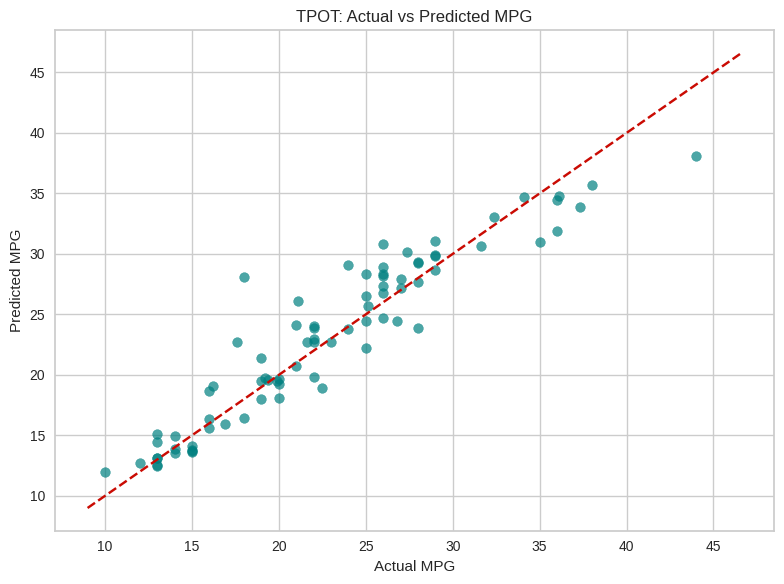

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('TPOT: Actual vs Predicted MPG')
plt.grid(True)
plt.tight_layout()
plt.show()